# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [2]:
arquivo = 'data/23.31S-42.82W-TAVG-Trend.txt'

In [11]:
def temp_mensal(arquivo):
    arquivo = open(arquivo)
    # For para a data.
    datas = []
    dados = []
    for linhas in arquivo:
        if linhas[0] != '%':
            coluna = linhas.split()
            if len(coluna) != 0:
                if coluna[2] != 'NaN':
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp = float(coluna[2])
                    dadosmes = dadostemp + 24.01
                    anomensal = ano + (mes/12)
                    datas.append(anomensal)
                    dados.append(dadosmes) 
    arquivo.close()
    return datas, dados


In [4]:
print (temp_mensal(arquivo)[0],temp_mensal(arquivo)[1])


[1832.0833333333333, 1832.1666666666667, 1832.25, 1832.3333333333333, 1832.4166666666667, 1832.5, 1832.5833333333333, 1832.6666666666667, 1832.75, 1832.8333333333333, 1832.9166666666667, 1833.0, 1833.0833333333333, 1833.1666666666667, 1833.25, 1833.3333333333333, 1833.4166666666667, 1833.5, 1833.5833333333333, 1833.6666666666667, 1833.75, 1833.8333333333333, 1833.9166666666667, 1834.0, 1834.0833333333333, 1834.1666666666667, 1834.25, 1834.3333333333333, 1834.4166666666667, 1834.5, 1834.5833333333333, 1834.6666666666667, 1834.75, 1834.8333333333333, 1834.9166666666667, 1835.0, 1835.0833333333333, 1835.1666666666667, 1835.25, 1835.3333333333333, 1835.4166666666667, 1835.5, 1835.5833333333333, 1835.6666666666667, 1835.75, 1835.8333333333333, 1835.9166666666667, 1836.0, 1836.0833333333333, 1836.1666666666667, 1836.25, 1836.3333333333333, 1836.4166666666667, 1836.5, 1836.5833333333333, 1836.6666666666667, 1836.75, 1836.8333333333333, 1836.9166666666667, 1837.0, 1837.0833333333333, 1837.1666

In [12]:
def temp_moveis(arquivo):
    arquivo = open(arquivo)
    # For para a data.
    datas = []
    dados_moveis = []
    for linhas in arquivo:
        if linhas[0] != '%':
            coluna = linhas.split()
            if len(coluna) != 0:
                if coluna[4] != 'NaN':
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp = float(coluna[4])
                    dadosmes = dadostemp + 24.01
                    anomensal = ano + (mes/12)
                    datas.append(anomensal)
                    dados_moveis.append(dadosmes) 
    arquivo.close()
    return datas, dados_moveis

(1832.0833333333333, 2013.6666666666667)

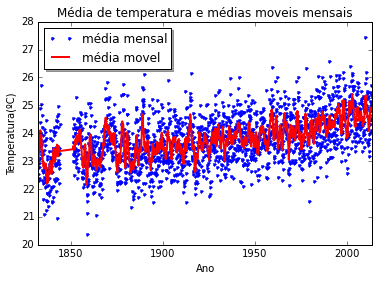

In [20]:
plt.figure()
plt.plot(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1],'.', label = 'média mensal')
plt.plot(temp_moveis(arquivo)[0],temp_moveis(arquivo)[1],'r', linewidth = 2 , label = 'média movel') 
plt.legend(loc='upper left', shadow=True, fontsize='large')
# legenda
plt.title('Média de temperatura e médias moveis mensais')
plt.ylabel('Temperatura(ºC)')
plt.xlabel('Ano')
plt.xlim(min(temp_mensal(arquivo)[0]), max(temp_mensal(arquivo)[0]))


### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).